In [45]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [46]:
import matplotlib.pyplot as plt
from BasicSetupUtilities.MetaDataBuilder import CountryMetaDataFile
from DataIOUtilities.DataLib import DataLib, DatastreamPulls
import pandas as pd
import numpy as np

dl = DataLib("SignalData")


# 1. Bond yields accross countries - which have highest and lowest returns?

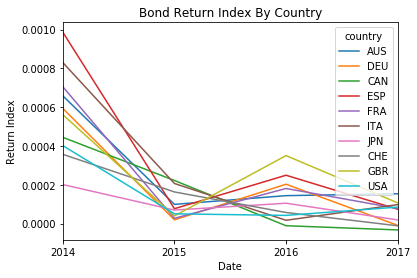

In [582]:
BondReturn = dl.pull('BondRetIdx/LocalFX')
BondReturnIndex = dl.pull('BondRetIdx/LocalFX').pct_change()
BondReturnIndexResampled = BondReturnIndex.resample('Y').mean()
BondReturnIndexResampled.loc[pd.Period('2014-03'):pd.Period('2017-03')].plot()
plt.xlabel('Date')
plt.ylabel('Return Index')
plt.title('Bond Return Index By Country')
plt.show()

Australia seems to have highest returns and Japan lowest returns. 

# 2. Rolling 3 year returns. Country that strongly out performs the rest of the world and a case where one underperforms?

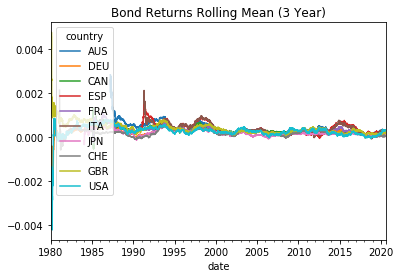

In [579]:
WEEKDAYS_IN_YEAR = 261

THREE_YEARS = WEEKDAYS_IN_YEAR*3

BondReturnIndexRollingMean = BondReturnIndex.rolling(THREE_YEARS, min_periods=10).mean()
BondReturnIndexRollingMean.plot()
plt.title('Bond Returns Rolling Mean (3 Year)')
plt.show()


Spain and Italy are going through a recession in 2016, to account for this crisis and boost economy expansion, the government tried to sell debt to fund the deficit, so they needed to increase interest rates. 


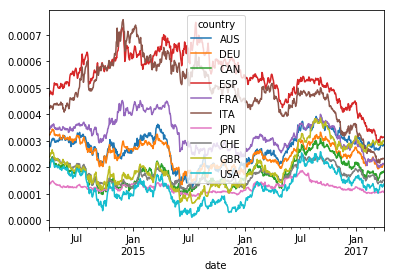

In [580]:
BondReturnIndexRollingMean.loc[pd.Period('2014-03'):pd.Period('2017-03')].plot()
plt.show()

In 1990, the US is overperforming for the market this must be due to 

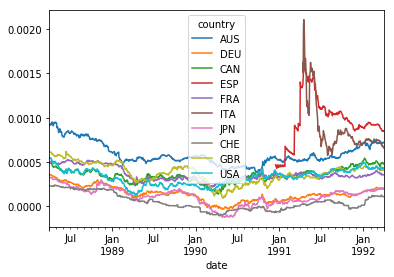

In [581]:
BondReturnIndexRollingMean.loc[pd.Period('1988-03'):pd.Period('1992-03')].plot()
plt.show()

# 3. Hedging currency exposure. How different would hedged and unhedged returns be? Why are British hedged and unhedged returns so different aroun 1992?

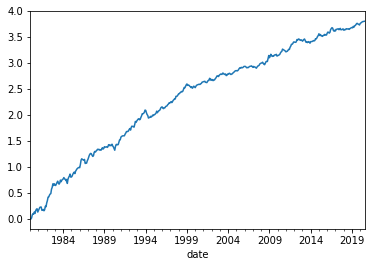

In [707]:
LocalReturnChangeHedged = BondReturn.resample('M').last().pct_change()
COUNTRY = 'GBR'

LocalReturnChangeHedged[COUNTRY].cumsum().plot()

In [708]:
BondReturn.tail()

country,AUS,DEU,CAN,ESP,FRA,ITA,JPN,CHE,GBR,USA
date,,,,,,,,,,
2020-07-28,1552.723,681.427,974.301,1356.134,891.165,1260.245,326.283,402.646,1071.062,735.002
2020-07-29,1560.318,680.876,973.545,1357.307,890.201,1262.268,326.350,401.559,1069.524,735.014
2020-07-30,1561.474,683.691,976.188,1361.476,892.925,1265.716,326.318,402.988,1072.101,737.767
2020-07-31,1566.580,682.927,974.392,1358.891,890.866,1260.103,326.478,402.702,1070.613,738.148
2020-08-03,1561.144,682.306,974.422,1358.511,891.402,1260.899,326.155,402.343,1070.725,736.332


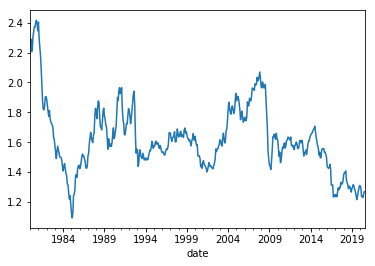

In [709]:
fxVsUSD = dl.pull('fxVsUSD').resample('M').last()
fxVsUSD[COUNTRY].plot()

In [710]:
fxVsUSD['USA'].tail()

date
2020-04    1.0934
2020-05    1.1107
2020-06    1.1237
2020-07    1.1635
2020-08       NaN
Freq: M, Name: USA, dtype: float64

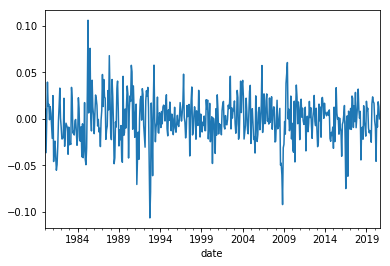

In [711]:
fxAppr = fxVsUSD.pct_change()
fxAppr[COUNTRY].plot()

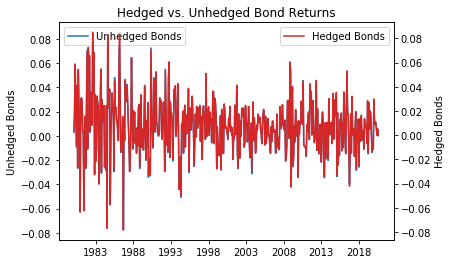

In [712]:
UnhedgedBonds = (1 + fxAppr )* LocalReturnChangeHedged


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1_label = 'Unhedged Bonds'
ax1.plot(UnhedgedBonds[COUNTRY].to_timestamp(), color = 'tab:blue', label = ax1_label)
ax1.set_ylabel(ax1_label)
ax1.legend(loc=2)
ax2_label = 'Hedged Bonds'
ax2.plot(LocalReturnChangeHedged[COUNTRY].to_timestamp(), color = 'tab:red', label = ax2_label)
ax2.set_ylabel(ax2_label)
ax2.legend()
plt.title('Hedged vs. Unhedged Bond Returns')
plt.show()

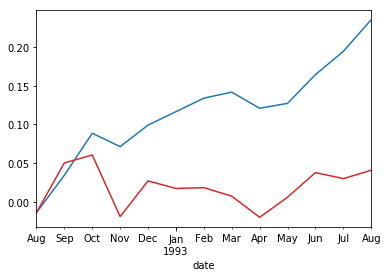

In [715]:
UnhedgedBonds[COUNTRY].loc[pd.Period('1992-08'):pd.Period('1993-08')].cumsum().plot(color = 'tab:blue')
LocalReturnChangeHedged[COUNTRY].loc[pd.Period('1992-08'):pd.Period('1993-08')].plot(color = 'tab:red')
plt.show()


Hedged and unhedged return difference would grow over time. British Sterling took a shock because of Black Wednesday. 

# 4. Average annual return and volatility of the 60/40 bond portfolio. Give a sharpe ratio (risk adjusted return ratio). Overlay a global bonds portfolio on top.

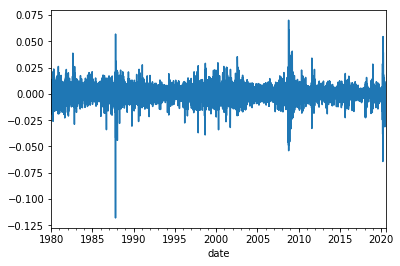

In [687]:
# Setting up equity prices for a yearly change 
EquityReturnChange = dl.pull('equityPrices').pct_change()
BondReturnChange = dl.pull('BondRetIdx/LocalFX').pct_change()

EquitySixtyBondForty = EquityReturnChange*0.6 + BondReturnChange*0.4

EquitySixtyBondForty['USA'].plot()

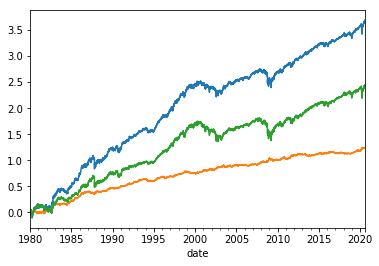

In [719]:
EquitySixtyBondForty['USA'].cumsum().plot() 
(BondReturnChange['USA'].cumsum()*.40).plot() #
(EquityReturnChange['USA'].cumsum()*.60).plot() #  

0.00034824880822925924

In [673]:
EquitySixtyBondForty.tail()

country,AUS,CAN,CHE,DEU,ESP,FRA,GBR,ITA,JPN,USA
date,,,,,,,,,,
2016,0.057809,0.103742,-0.029905,0.041621,0.023214,0.050132,0.122555,-0.063365,-0.004745,0.058900
2017,0.054307,0.032981,0.087767,0.058342,0.062654,0.071632,0.054158,0.069018,0.107547,0.125425
2018,-0.013864,-0.058668,-0.054796,-0.107068,-0.067866,-0.054623,-0.067901,-0.103349,-0.097332,-0.038543
2019,0.143300,0.125978,0.169700,0.139702,0.112531,0.179581,0.085750,0.219723,0.098292,0.212558
2020,-0.057651,0.009070,-0.024756,-0.029688,-0.144886,-0.090552,-0.097227,-0.099662,-0.064475,0.083001


Average annual returns is  in this market. 

In [345]:
# Sharpe Ratio 
PortfolioReturn = EquitySixtyBondForty['USA'].mean()
ShortRates = dl.pull('shortRates').resample('Y').mean().pct_change()
RiskFreeRates = ShortRates['USA'].mean()

In [358]:
# Calculating standard deviation of returns aka volatility 
import numpy as np
from math import sqrt
Volatility = np.std(EquitySixtyBondForty['USA'])
Volatility

0.08636773531124022

Volatility in this market is 8.6%. 

In [357]:
# Sharpe Final Calculation 
SharpeRatio = (PortfolioReturn - RiskFreeRates) / Volatility
SharpeRatio

1.0993419719864976

The Sharpe ratio is 109.9%.  

In [395]:
# Now creating bond portfolio 
def GlobalPortfolio():
    SharpeSum = 0 
    for i in range(len(countryList)):
        country = countryList[i]
        # Print country name
        #print(country)
        # Print average annual returns 
        #print(LocalReturnChangeHedged[country].mean())
        # Print volatility 
        #print(np.std(LocalReturnChangeHedged[country]))
        # Print Risk Free rates 
        #print(ShortRates[country].mean())
        # Sharpe Ratios
        Sharpe = (LocalReturnChangeHedged[country].mean() - ShortRates[country].mean()) / np.std(LocalReturnChangeHedged[country])
        SharpeSum += Sharpe
        #print(Sharpe)
    return 1/SharpeSum

def Weightings():
    weights = []
    for i in range(len(countryList)):
        country = countryList[i]
        Sharpe = (LocalReturnChangeHedged[country].mean() - ShortRates[country].mean()) / np.std(LocalReturnChangeHedged[country])
        #Print country 
        #print(country, Sharpe*GlobalPortfolio())
        weights.append(Sharpe*GlobalPortfolio())
    return weights
        

GlobalPortfolio()
Weightings()

[0.07027326295616546,
 0.12023291703822839,
 0.8566747001617235,
 0.11575565397626637,
 -0.8281304389313893,
 0.10236993778722786,
 0.08733710168584552,
 0.15900498183220996,
 0.07142611611086622,
 0.24505576738285592]

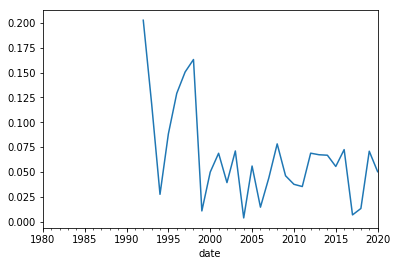

In [398]:
# Creating weights for portfolio - lower volatility, higher mean 
AverageReturnsGlobalBond = Weightings()[0]*LocalReturnChangeHedged['USA']+ Weightings()[1]*LocalReturnChangeHedged['AUS']+ Weightings()[2]*LocalReturnChangeHedged['JPN']+Weightings()[3]*LocalReturnChangeHedged['CAN']+Weightings()[4]*LocalReturnChangeHedged['CHE']+Weightings()[5]*LocalReturnChangeHedged['GBR']+Weightings()[6]*LocalReturnChangeHedged['ESP']+Weightings()[7]*LocalReturnChangeHedged['FRA']+Weightings()[8]*LocalReturnChangeHedged['ITA']+Weightings()[9]*LocalReturnChangeHedged['DEU']
AverageReturnsGlobalBond.plot()

In [399]:
AverageReturnsGlobalBondMean = Weightings()[0]*LocalReturnChangeHedged['USA'].mean()+ Weightings()[1]*LocalReturnChangeHedged['AUS'].mean()+ Weightings()[2]*LocalReturnChangeHedged['JPN'].mean()+Weightings()[3]*LocalReturnChangeHedged['CAN'].mean()+Weightings()[4]*LocalReturnChangeHedged['CHE'].mean()+Weightings()[5]*LocalReturnChangeHedged['GBR'].mean()+Weightings()[6]*LocalReturnChangeHedged['ESP'].mean()+Weightings()[7]*LocalReturnChangeHedged['FRA'].mean()+Weightings()[8]*LocalReturnChangeHedged['ITA'].mean()+Weightings()[9]*LocalReturnChangeHedged['DEU'].mean()
AverageReturnsGlobalBondMean

0.07759401369152392

Seems to perform less well than the 60-40 split. 

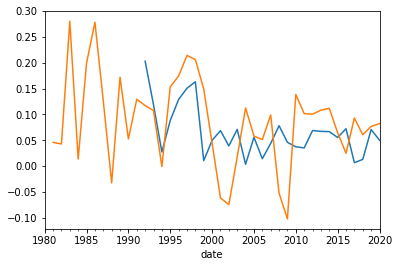

In [402]:
AverageReturnsGlobalBond.plot() # in blue
EquitySixtyBondForty['USA'].plot() # in orange
plt.show()

# 5. Standard money supply wanted. 

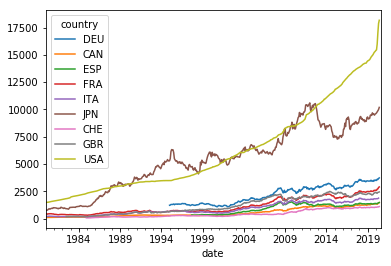

In [416]:
m2_usd = dl.pull("M2/inUSD")
m2_usd.plot()

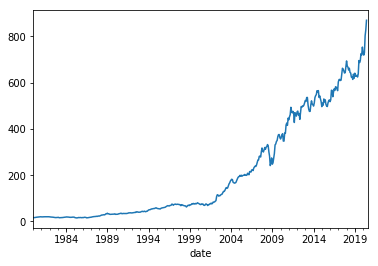

In [419]:
m1_usd = dl.pull("M1/inUSD")
m1_usd['AUS'].plot()

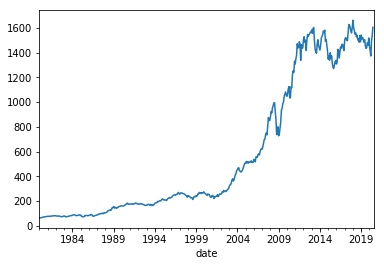

In [420]:
m3_usd = dl.pull("M3/inUSD")
m3_usd['AUS'].plot()

M1 includes money in circulation plus checkable deposits in banks. M2 includes M1 plus savings deposits (less than $100,000) and money market mutual funds. M3 includes M2 plus large time deposits in banks. \\
So M3 includes M2 which includes M1. Aka M3 = M2 + deposits, M2 = M1 + savings so M3 - deposits = M1 + savings. \\
To report on the money supply you might look at the current account. 

# 6. Big interest rates or steep FX decline. Does the data show that in all countries? 

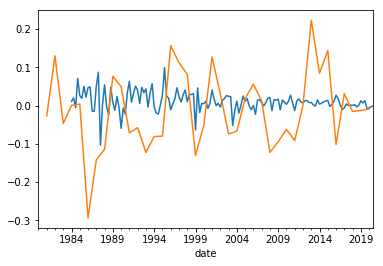

In [471]:
CURRENT_ACCOUNT_COUNTRY = 'JPN'
InterestRates = dl.pull("BondRetIdx/LocalFX").resample('Q').mean().pct_change() # in blue
FXChange = dl.pull('fxVsUSD').resample('Y').mean().pct_change() # in orange
InterestRates[CURRENT_ACCOUNT_COUNTRY].plot()
FXChange[CURRENT_ACCOUNT_COUNTRY].plot()

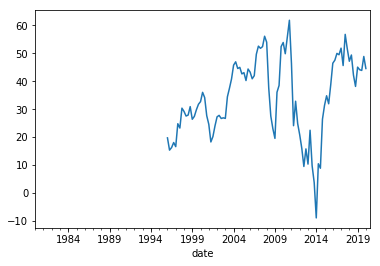

In [472]:
CurrentAccount = dl.pull("CurrAcctNom/inUSD")
CurrentAccount[CURRENT_ACCOUNT_COUNTRY].plot()

In Australia we see steep currency declines when the current account stayed persistently negative. In the US we did not see this same ocurrence. 

# 7. Proxy growth and inflation expectations over last 5 yrs. 

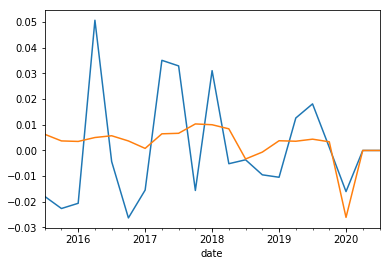

In [602]:
# looking at inflation
CURRENT_ACCOUNT_COUNTRY = 'CHE'

NominalGDP = dl.pull("GDP/Nominal").resample('Q').last().pct_change() # in blue
RealGDP = dl.pull("GDP/Real").resample('Q').last().pct_change() # in orange
Inflation = (NominalGDP - RealGDP).pct_change()

NominalGDP[CURRENT_ACCOUNT_COUNTRY].loc[pd.Period('2015-08'):pd.Period('2020-08')].plot()
RealGDP[CURRENT_ACCOUNT_COUNTRY].loc[pd.Period('2015-08'):pd.Period('2020-08')].plot()


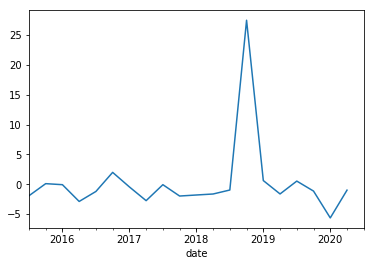

In [603]:
# Proxy of inflation using GDP 
Inflation[CURRENT_ACCOUNT_COUNTRY].loc[pd.Period('2015-08'):pd.Period('2020-08')].plot()

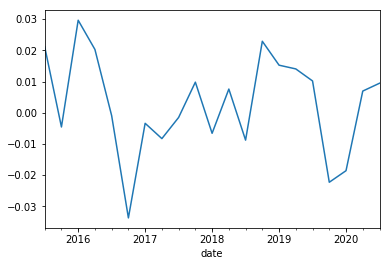

In [605]:
BondReturnIndex = dl.pull('BondRetIdx/LocalFX').resample('Q').last().pct_change()
BondReturnIndex[CURRENT_ACCOUNT_COUNTRY].loc[pd.Period('2015-08'):pd.Period('2020-08')].plot()